In [40]:
import math
def binarysearch(nums,left,right,target,counter):
  counter[0]+=1
  if(left>right):
      return -1;
  mid=left+(right-left)//2;
  if(nums[mid]==target):
      return mid;
  elif(nums[mid]<target):
      return binarysearch(nums,mid+1,right,target,counter)
  else:
      return binarysearch(nums,left,mid-1,target,counter)
def time_search(func, arr, target, runs=1000):
    total = 0
    for _ in range(runs):
        start = time.perf_counter()
        func(arr, 0, len(arr) - 1, target,[0])
        total += (time.perf_counter() - start)
    return (total / runs) * 1e6  # Microseconds 

In [41]:
import time
import matplotlib.pyplot as plt
import random

sizes = [10, 100, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
timeavg = []
timemid = []
timeworst = []
steps_best = []
steps_avg = []
steps_worst = []
for n in sizes:
    arr = list(range(n))  
    target =arr[len(arr)//2] 
    counter = [0]
    binarysearch(arr, 0, n - 1, target, counter)
    steps_best.append(counter[0])
    timemid.append(time_search(binarysearch,arr,target))
    target =arr[random.randint(0,n-1)]
    counter = [0]
    binarysearch(arr, 0, n - 1, target, counter)
    steps_avg.append(counter[0])
    timeavg.append(time_search(binarysearch,arr,target))
    target =-1   
    counter = [0]
    binarysearch(arr, 0, n - 1, target, counter)
    steps_worst.append(counter[0])
    timeworst.append(time_search(binarysearch,arr,target))
      
   
  
  
   

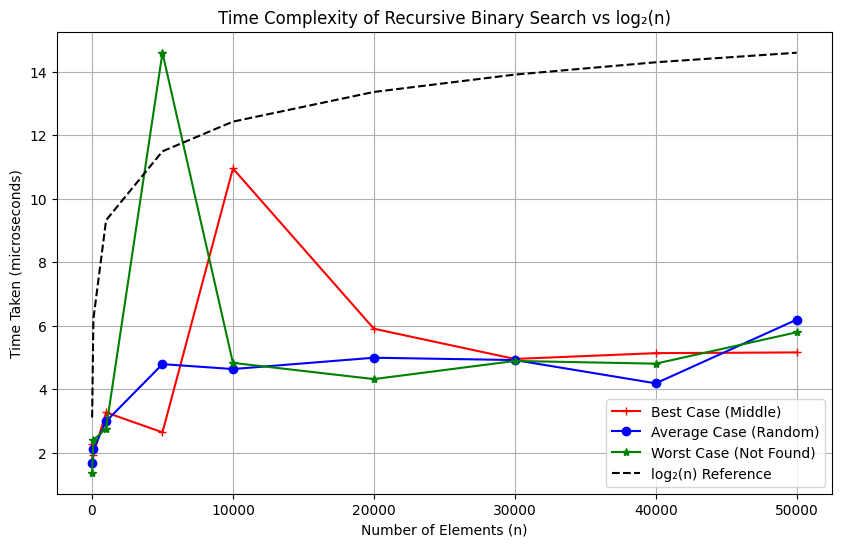

In [42]:
logn = [math.log2(n) for n in sizes]

max_time = max(max(timemid), max(timeavg), max(timeworst))
max_logn = max(logn)
scaledlog = [val * (max_time / max_logn) for val in logn]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sizes, timemid, 'r+-', label='Best Case (Middle)')
plt.plot(sizes, timeavg, 'bo-', label='Average Case (Random)')
plt.plot(sizes, timeworst, 'g*-', label='Worst Case (Not Found)')
plt.plot(sizes, scaledlog, 'k--', label='log₂(n) Reference')

plt.title('Time Complexity of Recursive Binary Search vs log₂(n)')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time Taken (microseconds)')
plt.grid(True)
plt.legend()
plt.show()

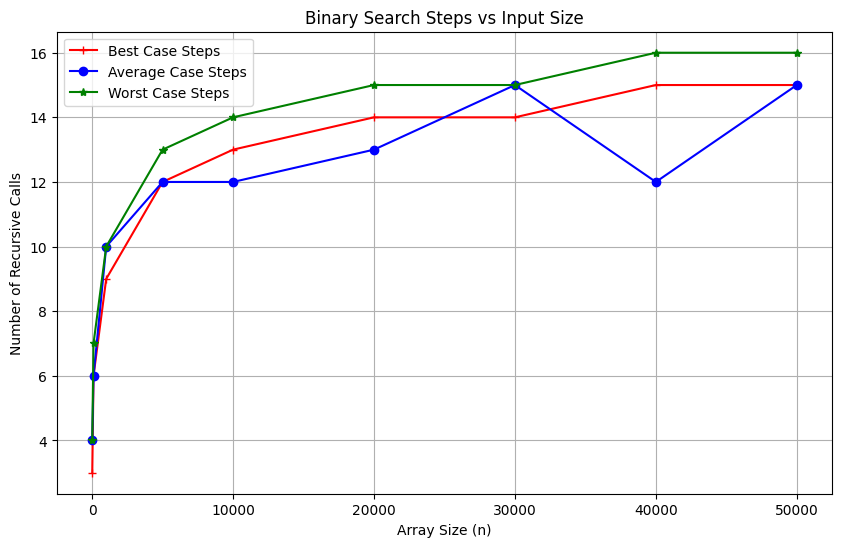

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, steps_best, 'r+-', label='Best Case Steps')
plt.plot(sizes, steps_avg, 'bo-', label='Average Case Steps')
plt.plot(sizes, steps_worst, 'g*-', label='Worst Case Steps')
plt.title('Binary Search Steps vs Input Size')
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Recursive Calls')
plt.grid(True)
plt.legend()
plt.show()